## import API

In [1]:
from numpy import linalg as LA
from scipy.sparse.linalg.eigen.arpack import eigsh as largest_eigsh
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score
from multi import *
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

# 读取文本文件
df = pd.read_csv('matrix1_data.txt', sep='\t', header=None)

# 将DataFrame转换为NumPy数组
matrix = df.values

# 或者使用to_numpy()方法
matrix = df.to_numpy()

# 显示NumPy数组
print(matrix.shape)

(232, 232)


## SBM model

In [2]:
times = 10
ISCACC = np.zeros((1,times))
SumACC = np.zeros((1,times))
SCMEACC = np.zeros((1,times))
ASCACC = np.zeros((1,times))
MEANACC = np.zeros((1,times))

for m in range(1):
    for i in range(times):
        n = 100
        beta = 3
        theta = 1/n
        k = 2
        B = np.zeros((k,k,k))
        B[0,0,0] = theta
        B[1,1,1] = theta/(beta)
        B[0,1,0] = theta/(beta**3)
        B[1,1,0] = theta/(beta**2)
        B[1,0,0] = theta/(beta**3)
        B[0,0,1] = theta/(beta**3)
        B[1,0,1] = theta/(beta**2)
        B[0,1,1] = theta/(beta**2)
        L = 2
        A1 = np.zeros((L,n,n))
        A = np.zeros((L,n,n))
        A2 = np.zeros((L,n,n))
        z = np.random.randint(k, size=n)
        p_in = (0.1, 0.15)  # 同社区连接概率大于不同社区
        p_out = 0.1  # 不同社区间连接的概率
        for l in range(L):
            B_t = np.full((k, k), p_out)
            # 设置对角线元素，随机从0.2到0.25的均匀分布中生成
            np.fill_diagonal(B_t, np.random.uniform(p_in[0], p_in[1],k))
            for x in range(n):
                for c in range(x+1, n):  # 只填充上三角矩阵
                    p_ij = B_t[int(z[x]),int(z[c])]
                    if(p_ij>1):
                        p_ij = 1
                    A2[l,x, c]= np.random.binomial(1, p_ij)
                    A2[l,c, x] = A2[l,x, c]  # 确保邻接矩阵是对称的
        for l in range(L):
            for q in range(n):
                for w in range(q+1,n):
                    for e in range(w+1,n):
                        p_ijl = B[int(z[q]),int(z[w]),int(z[e])]
                        if(p_ijl>1):
                            p_ijl = 1
                        tran = np.random.binomial(1, p_ijl)
                        if tran == 1:
                            A1[l,q, w] = A1[l,q,e] = A1[l,w,e] = A1[l,w,q] = A1[l,e,q] = A1[l,e,w] = 1
        for l in range(L):
            for q in range(n):
                for w in range(q+1,n):
                    if ((A1[l,q,w]+A2[l,q,w])>0.1):
                        A[l,q,w] = A[l,w,q] = 1 
                        
        test = ISC(A,k)
        lamb,label = test.opt()
        ISCACC[m,i] = round(adjusted_rand_score(label,z),4)
        
        test = SumSVD(A,k)
        lamb,label = test.opt()
        SumACC[m,i] = round(adjusted_rand_score(label,z),4)
        
#         test = SCME(A,k,method = 'gmm')
#         label,lamb,eratio = test.optimize(itr = 10)
#         SCMEACC[m,i] = round(adjusted_rand_score(label,z),4)


#         kmeans = ASC(A,k)
#         ASCACC[m,i] = adjusted_rand_score(kmeans.labels_,z)
        
#         evals, evecs = largest_eigsh(sum([a*b for a,b in zip([1/L]*L,A)]),k+1, which='LM')
#         evals_abs = abs(evals)
#         evecs = evecs[:,evals_abs.argsort()]
#         evals = evals[evals_abs.argsort()]
#         model = GaussianMixture(n_components=k,n_init=10).fit(np.real(evecs[:,1:]))
#         label = model.predict(np.real(evecs[:,1:]))
#         MEANACC[m,i] = adjusted_rand_score(label,z)

In [3]:
print(sum(SumACC[0])/times)
print(sum(ISCACC[0])/times)
# print(sum(SCMEACC[0])/times)
# print(sum(ASCACC[0])/times)
# print(sum(MEANACC[0])/times)

0.84841
1.0


In [ ]:
ISCACC = np.zeros((50,12))
SCMEACC = np.zeros((50,12))
MSCORE = np.zeros((50,12))
ASCACC = np.zeros((50,12))
MEANACC = np.zeros((50,12))

for m in range(20):
    for i in range(12):
        n = 100
        k = 3
        L = 4
        p = 6
        rho = 1
        sigma = 0.25 + 0.25*i
        # 网络稀疏程度
        pi = [1/2,1/3,1/6]
        Alist = [np.array([[0.4,0.2,0.3],[0.2,0.5,0.4],[0.3,0.4,0.7]]),np.array([[0.5,0.1,0.1],[0.1,0.5,0.1],[0.1,0.1,0.5]]),np.array([[0.4,0.3,0.2],[0.3,0.2,0.1],[0.2,0.1,0.1]]),np.array([[0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5]])]
        Ares,gt = genSBM(n,k,L,rho,pi,Alist)


        test = ISC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        print(lamb)
        ISCACC[m,i] = round(adjusted_rand_score(label,gt),4)


        test = DSC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        print(lamb)
        MSCORE[m,i] = round(adjusted_rand_score(label,gt),4)
        
        test = SCME(Ares,k,method = 'gmm')
        label,lamb,eratio = test.optimize(itr = 10)
        SCMEACC[m,i] = round(adjusted_rand_score(label,gt),4)


        kmeans = ASC(Ares,k)
        ASCACC[m,i] = adjusted_rand_score(kmeans.labels_,gt)
    
    
        evals, evecs = largest_eigsh(sum([a*b for a,b in zip([1/L]*L,Ares)]),k+1, which='LM')
        evals_abs = abs(evals)
        evecs = evecs[:,evals_abs.argsort()]
        evals = evals[evals_abs.argsort()]
        model = GaussianMixture(n_components=k,n_init=10).fit(np.real(evecs[:,1:]))
        label = model.predict(np.real(evecs[:,1:]))
        MEANACC[m,i] = adjusted_rand_score(label,gt)

[0.24382462 0.69941435 0.05676103 0.        ]
[0.24382462 0.69941435 0.05676103 0.        ]
[0.20347526 0.67122061 0.12530413 0.        ]
[0.20347526 0.67122061 0.12530413 0.        ]
[0.2012112  0.65836336 0.14042545 0.        ]
[0.2012112  0.65836336 0.14042545 0.        ]
[0.24990174 0.63102198 0.11907628 0.        ]
[0.24635367 0.61084653 0.1427998  0.        ]
[0.22289498 0.65700314 0.12010187 0.        ]
[0.22289498 0.65700314 0.12010187 0.        ]
[0.19719334 0.70817403 0.09257693 0.00205571]
[0.19719334 0.70817403 0.09257693 0.00205571]
[0.21681519 0.63283202 0.15035279 0.        ]
[0.21681519 0.63283202 0.15035279 0.        ]
[0.19681598 0.69654519 0.10663884 0.        ]
[0.19681598 0.69654519 0.10663884 0.        ]
[0.17071178 0.70374392 0.1255443  0.        ]
[0.17071178 0.70374392 0.1255443  0.        ]
[0.22247472 0.64092328 0.136602   0.        ]
[0.22247472 0.64092328 0.136602   0.        ]
[0.21944811 0.67779983 0.10275206 0.        ]
[0.37171402 0.62828598 0.         

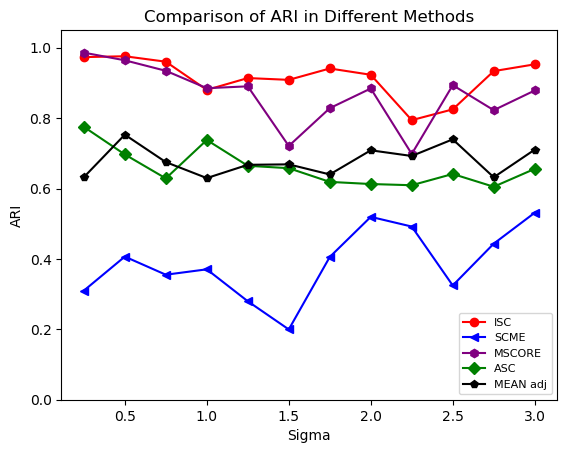

In [7]:
x_lab = np.array([0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3])
plt.plot(x_lab,np.sum (ISCACC, axis= 0)/20,color="red", label="ISC",marker = 'o')
plt.plot(x_lab,np.sum (SCMEACC, axis= 0)/20,color="blue", label="SCME",marker = "<")
plt.plot(x_lab,np.sum (MSCORE, axis= 0)/20,color="purple", label="MSCORE",marker = "h")
plt.plot(x_lab,np.sum (ASCACC, axis= 0)/20,color="green", label="ASC",marker = "D")
plt.plot(x_lab,np.sum (MEANACC, axis= 0)/20,color="black", label="MEAN adj",marker = "p")
plt.legend(loc="lower right",fontsize=8)   # 与plt.legend(loc=1)等价
plt.title("Comparison of ARI in Different Methods")
plt.ylim((0, 1.05))
plt.xlabel('Sigma')
plt.ylabel('ARI')
plt.savefig('Cov_SBM_node.pdf')

## DCBM model

In [71]:
ISCACC = np.zeros((100,10))
SCMEACC = np.zeros((100,10))
MSCORE = np.zeros((100,10))
ASCACC = np.zeros((100,10))
MEANACC = np.zeros((100,10))

for m in range(100):
    for i in range(10):
        n = 30+30*i
        k = 3
        L = 4
        p = 6
        rho = 1
        sigma = 0.5
        # 网络稀疏程度
        pi = [1/2,1/3,1/6]
        Alist = [np.array([[0.4,0.2,0.3],[0.2,0.5,0.4],[0.3,0.4,0.7]]),np.array([[0.5,0.1,0.1],[0.1,0.5,0.1],[0.1,0.1,0.5]]),np.array([[0.4,0.3,0.2],[0.3,0.2,0.1],[0.2,0.1,0.1]]),np.array([[0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5]])]
        # 网络稀疏程度
        theta = np.random.uniform(0.2, 2, n)
        Ares,gt = genDCBM(n,k,L,rho,pi,Alist,theta)
        label = np.array(gt)
        covariate = generate_hetro_covariate(n, k, sigma, label, p)
        mean = np.mean(covariate)
        std_dev = np.std(covariate)
        covariate = (covariate - mean) / std_dev
        np.fill_diagonal(covariate, 0)
        Ares = np.concatenate((Ares, [covariate]), axis=0)


        test = ISC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        ISCACC[m,i] = round(adjusted_rand_score(label,gt),4)


        test = DSC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        MSCORE[m,i] = round(adjusted_rand_score(label,gt),4)


        test = SCME(Ares,k,method = 'gmm')
        label,lamb,eratio = test.optimize(itr = 10)
        SCMEACC[m,i] = round(adjusted_rand_score(label,gt),4)



        kmeans = ASC(Ares,k)
        ASCACC[m,i] = adjusted_rand_score(kmeans.labels_,gt)



        evals, evecs = largest_eigsh(sum([a*b for a,b in zip([1/L]*L,Ares)]),k+1, which='LM')
        evals_abs = abs(evals)
        evecs = evecs[:,evals_abs.argsort()]
        evals = evals[evals_abs.argsort()]
        model = GaussianMixture(n_components=k,n_init=10).fit(np.real(evecs[:,1:]))
        label = model.predict(np.real(evecs[:,1:]))
        MEANACC[m,i] = adjusted_rand_score(label,gt)

C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 =

ValueError: Complex data not supported
[[-0.55868991+0.j -0.06513342+0.j]
 [ 1.07781436+0.j -1.2353664 +0.j]
 [ 1.54817625+0.j  0.24875384+0.j]
 [-0.64911171+0.j -1.36325779+0.j]
 [-1.07175477+0.j -2.71929751+0.j]
 [ 1.29452216+0.j  1.14943254+0.j]
 [ 3.40119738+0.j  3.40119738+0.j]
 [ 0.        +0.j  0.        +0.j]
 [-2.60712866+0.j  2.87355104+0.j]
 [-1.12209345+0.j -2.0882132 +0.j]
 [-1.17356315+0.j  0.88653511+0.j]
 [ 0.6843947 +0.j -0.11721729+0.j]
 [-0.36328275+0.j -2.19331787+0.j]
 [-0.74626685+0.j -0.11868999+0.j]
 [-0.33376373+0.j -3.40119738+0.j]
 [-1.18099247+0.j -0.59585793+0.j]
 [ 0.11124803+0.j -1.54185974+0.j]
 [-1.29110522+0.j  3.40119738+0.j]
 [ 2.29888327+0.j -1.81697667+0.j]
 [-1.39022183+0.j  0.18691932+0.j]
 [ 2.10994533+0.j  2.02668458+0.j]
 [ 0.18564121+0.j -1.6725406 +0.j]
 [ 2.10994533+0.j  2.02668458+0.j]
 [-2.60712866+0.j  2.87355104+0.j]
 [ 1.91755518+0.j  1.58012713+0.j]
 [-2.05787073+0.j  3.40119738+0.j]
 [-0.76036962+0.j  0.03779441+0.j]
 [-2.03259198+0.j  2.58780937+0.j]
 [ 0.74330911+0.j  0.8628181 +0.j]
 [-0.77256886+0.j -0.06032466+0.j]]


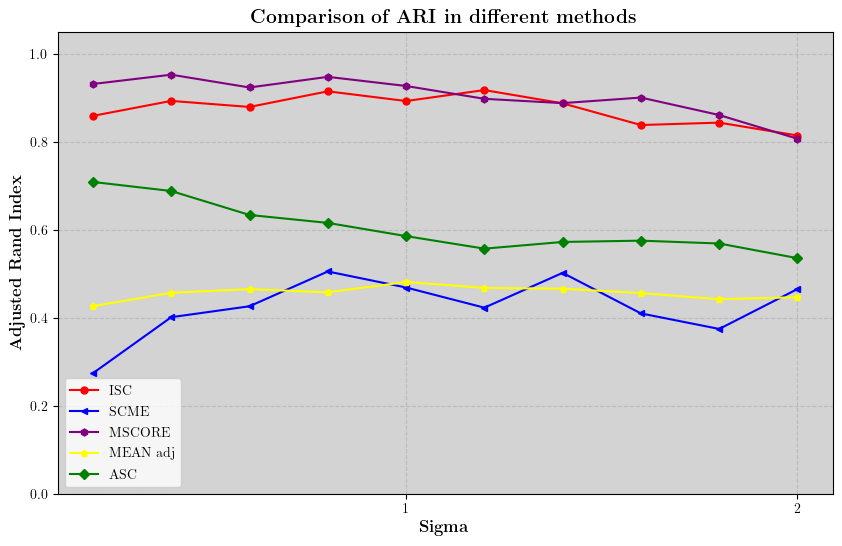

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Ensure that LaTeX is used for all text rendering for a professional look
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Data
x_lab = np.array([0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2])
ISC = np.array([0.8586  , 0.892638, 0.878896, 0.914401, 0.892357, 0.91726 ,
       0.887083, 0.837818, 0.843264, 0.813984])
SCME = np.array([0.273753, 0.401058, 0.425906, 0.504956, 0.468546, 0.422706,
       0.501829, 0.409667, 0.374344, 0.46503 ])
MSCORE = np.array([0.931061, 0.952209, 0.923135, 0.947297, 0.926554, 0.897394,
       0.887566, 0.900218, 0.860532, 0.806571])
MEAN = np.array([0.42602346, 0.45656365, 0.464884  , 0.45755519, 0.48096579,
       0.46769255, 0.46571956, 0.45593526, 0.44187143, 0.44644954])
ASC = np.array([0.70844231, 0.68784123, 0.63342346, 0.61538521, 0.58535935,
       0.55683919, 0.57205925, 0.57502211, 0.56853786, 0.53522834])


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_lab, ISC, color="red", label="ISC", marker='o', markersize=5)
plt.plot(x_lab, SCME, color="blue", label="SCME", marker='<', markersize=5)
plt.plot(x_lab, MSCORE, color="purple", label="MSCORE", marker='h', markersize=5)
plt.plot(x_lab, MEAN, color="yellow", label="MEAN adj", marker='p', markersize=5)
plt.plot(x_lab, ASC, color="green", label="ASC", marker='D', markersize=5)

# Enhancements
plt.legend(loc="best", fontsize=10)   # Automatically place the legend where it fits best
plt.title(r"\textbf{Comparison of ARI in different methods}", fontsize=14)
plt.ylim((0, 1.05))
plt.xlabel(r'\textbf{Sigma}', fontsize=12)
plt.ylabel(r'\textbf{Adjusted Rand Index}', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with a dashed line pattern and some transparency
plt.gca().set_facecolor('lightgrey')  # Set the axes background color to light grey
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure that only integer sigma values are used as x-ticks

# Save the figure
plt.savefig('WY_Cov_DCSBM_node.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()  # Display the plot


# Different number of layers

## SBM model

In [31]:
ISCACC = np.zeros((100,5))
SCMEACC = np.zeros((100,5))
MSCORE = np.zeros((100,5))
ASCACC = np.zeros((100,5))
MEANACC = np.zeros((100,5))

for m in range(100):
    for i in range(5):
        n = 100
        k = 3
        L = i+2
        rho = 1
        # 网络稀疏程度
        pi = [1/2,1/3,1/6]
        Alist = [np.array([[0.4,0.2,0.3],[0.2,0.5,0.4],[0.3,0.4,0.7]]),np.array([[0.5,0.1,0.1],[0.1,0.5,0.1],[0.1,0.1,0.5]]),np.array([[0.4,0.3,0.2],[0.3,0.2,0.1],[0.2,0.1,0.1]]),np.array([[0.8,0.5,0.4],[0.5,0.6,0.3],[0.4,0.3,0.4]]),np.array([[0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5]]),np.array([[0.3,0.3,0.3],[0.3,0.3,0.3],[0.3,0.3,0.3]])]
        # 网络稀疏程度
        Ares,gt = genSBM(n,k,L,rho,pi,Alist)
        ## 产生一个SBM，Ares为邻接矩阵，gt为节点隶属社区


        test = ISC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        # print('Weights: ',np.round(lamb,4))
        ISCACC[m,i] = round(adjusted_rand_score(label,gt),4)


        test = DSC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        # print('Weights: ',np.round(lamb,4))
        MSCORE[m,i] = round(adjusted_rand_score(label,gt),4)


        test = SCME(Ares,k,method = 'gmm')
        label,lamb,eratio = test.optimize(itr = 10)
        SCMEACC[m,i] = round(adjusted_rand_score(label,gt),4)


        kmeans = ASC(Ares,k)
        ASCACC[m,i] = adjusted_rand_score(kmeans.labels_,gt)



        evals, evecs = largest_eigsh(sum([a*b for a,b in zip([1/L]*L,Ares)]),k+1, which='LM')
        evals_abs = abs(evals)
        evecs = evecs[:,evals_abs.argsort()]
        evals = evals[evals_abs.argsort()]
        model = GaussianMixture(n_components=k,n_init=10).fit(np.real(evecs[:,1:]))
        label = model.predict(np.real(evecs[:,1:]))
        MEANACC[m,i] = adjusted_rand_score(label,gt)
    

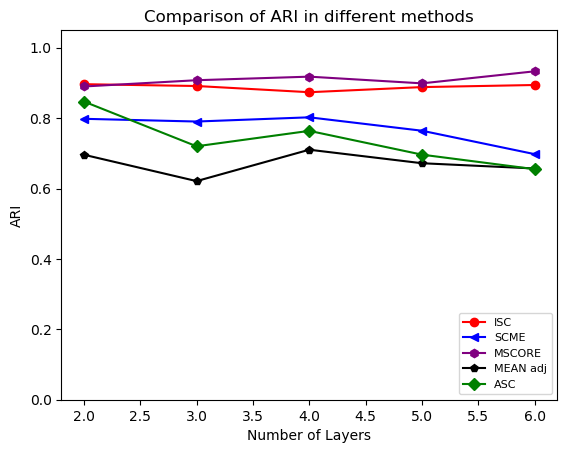

In [33]:
x_lab = np.array([2,3,4,5,6])
plt.plot(x_lab,np.sum (ISCACC, axis= 0)/100,color="red", label="ISC",marker = 'o')
plt.plot(x_lab,np.sum (SCMEACC, axis= 0)/100,color="blue", label="SCME",marker = "<")
plt.plot(x_lab,np.sum (MSCORE, axis= 0)/100,color="purple", label="MSCORE",marker = "h")
plt.plot(x_lab,np.sum (MEANACC, axis= 0)/100,color="black", label="MEAN adj",marker = "p")
plt.plot(x_lab,np.sum (ASCACC, axis= 0)/100,color="green", label="ASC",marker = "D")
plt.legend(loc="lower right",fontsize=8)   # 与plt.legend(loc=1)等价
plt.title("Comparison of ARI in different methods")
plt.ylim((0, 1.05))
plt.xlabel('Number of Layers')
plt.ylabel('ARI')
plt.savefig('SBM_Layer.pdf')

## DCBM model

In [34]:
ISCACC = np.zeros((100,5))
SCMEACC = np.zeros((100,5))
MSCORE = np.zeros((100,5))
ASCACC = np.zeros((100,5))
MEANACC = np.zeros((100,5))

for m in range(100):
    for i in range(5):
        n = 100
        k = 3
        L = i+2
        rho = 1
        pi = [1/2,1/3,1/6]
        Alist = [np.array([[0.4,0.2,0.3],[0.2,0.5,0.4],[0.3,0.6,0.7]]),np.array([[0.5,0.1,0.1],[0.1,0.5,0.1],[0.1,0.1,0.5]]),np.array([[0.4,0.3,0.2],[0.3,0.2,0.1],[0.2,0.1,0.1]]),np.array([[0.8,0.5,0.4],[0.5,0.6,0.3],[0.4,0.3,0.4]]),np.array([[0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5]]),np.array([[0.3,0.3,0.3],[0.3,0.3,0.3],[0.3,0.3,0.3]])]
        theta = np.random.uniform(0.2,2, n)
        Ares,gt = genDCBM(n,k,L,rho,pi,Alist,theta)
        ## 产生一个SBM，Ares为邻接矩阵，gt为节点隶属社区


        test = ISC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        ISCACC[m,i] = round(adjusted_rand_score(label,gt),4)


        test = DSC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        MSCORE[m,i] = round(adjusted_rand_score(label,gt),4)
        


        test = SCME(Ares,k,method = 'gmm')
        label,lamb,eratio = test.optimize(itr = 10)
        SCMEACC[m,i] = round(adjusted_rand_score(label,gt),4)


        kmeans = ASC(Ares,k)
        ASCACC[m,i] = adjusted_rand_score(kmeans.labels_,gt)



        evals, evecs = largest_eigsh(sum([a*b for a,b in zip([1/L]*L,Ares)]),k+1, which='LM')
        evals_abs = abs(evals)
        evecs = evecs[:,evals_abs.argsort()]
        evals = evals[evals_abs.argsort()]
        model = GaussianMixture(n_components=k,n_init=10).fit(np.real(evecs[:,1:]))
        label = model.predict(np.real(evecs[:,1:]))
        MEANACC[m,i] = adjusted_rand_score(label,gt)


C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 =

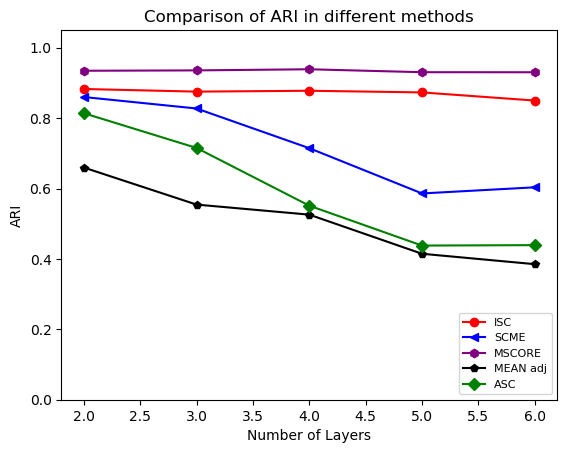

In [35]:
x_lab = np.array([2,3,4,5,6])
plt.plot(x_lab,np.sum (ISCACC, axis= 0)/100,color="red", label="ISC",marker = 'o')
plt.plot(x_lab,np.sum (SCMEACC, axis= 0)/100,color="blue", label="SCME",marker = "<")
plt.plot(x_lab,np.sum (MSCORE, axis= 0)/100,color="purple", label="MSCORE",marker = "h")
plt.plot(x_lab,np.sum (MEANACC, axis= 0)/100,color="black", label="MEAN adj",marker = "p")
plt.plot(x_lab,np.sum (ASCACC, axis= 0)/100,color="green", label="ASC",marker = "D")
plt.legend(loc="lower right",fontsize=8)
plt.title("Comparison of ARI in different methods")
plt.ylim((0, 1.05))
plt.xlabel('Number of Layers')
plt.ylabel('ARI')
plt.savefig('DCBM_Layer.pdf')

# Change the sparsity of network

In [37]:
ISCACC = np.zeros((100,10))
SCMEACC = np.zeros((100,10))
MSCORE = np.zeros((100,10))
ASCACC = np.zeros((100,10))
MEANACC = np.zeros((100,10))

for m in range(100):
    for i in range(10):
        n = 100
        k = 3
        L = 4
        rho = 0.1*i+0.4
        # 网络稀疏程度
        pi = [1/2,1/3,1/6]
        Alist = [np.array([[0.4,0.2,0.3],[0.2,0.5,0.4],[0.3,0.4,0.7]]),np.array([[0.5,0.1,0.1],[0.1,0.5,0.1],[0.1,0.1,0.5]]),np.array([[0.4,0.3,0.2],[0.3,0.2,0.1],[0.2,0.1,0.1]]),np.array([[0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5]])]
        Ares,gt = genSBM(n,k,L,rho,pi,Alist)

        test = ISC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        ISCACC[m,i] = round(adjusted_rand_score(label,gt),k)


        test = DSC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        MSCORE[m,i] = round(adjusted_rand_score(label,gt),k)


        test = SCME(Ares,k,method = 'gmm')
        label,lamb,eratio = test.optimize(itr = 10)
        SCMEACC[m,i] = round(adjusted_rand_score(label,gt),k)


        kmeans = ASC(Ares,k)
        ASCACC[m,i] = adjusted_rand_score(kmeans.labels_,gt)



        evals, evecs = largest_eigsh(sum([a*b for a,b in zip([1/L]*L,Ares)]),k+1, which='LM')
        evals_abs = abs(evals)
        evecs = evecs[:,evals_abs.argsort()]
        evals = evals[evals_abs.argsort()]
        model = GaussianMixture(n_components=k,n_init=10).fit(np.real(evecs[:,1:]))
        label = model.predict(np.real(evecs[:,1:]))
        MEANACC[m,i] = adjusted_rand_score(label,gt)  

C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))


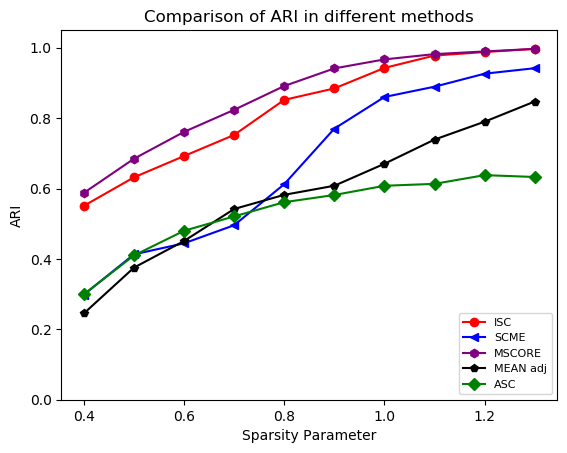

In [39]:
x_lab = np.array([0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3])
plt.plot(x_lab,np.sum (ISCACC, axis= 0)/100,color="red", label="ISC",marker = 'o')
plt.plot(x_lab,np.sum (SCMEACC, axis= 0)/100,color="blue", label="SCME",marker = "<")
plt.plot(x_lab,np.sum (MSCORE, axis= 0)/100,color="purple", label="MSCORE",marker = "h")
plt.plot(x_lab,np.sum (MEANACC, axis= 0)/100,color="black", label="MEAN adj",marker = "p")
plt.plot(x_lab,np.sum (ASCACC, axis= 0)/100,color="green", label="ASC",marker = "D")
plt.legend(loc="lower right",fontsize=8)   # 与plt.legend(loc=1)等价
plt.title("Comparison of ARI in different methods")
plt.ylim((0, 1.05))
plt.xlabel('Sparsity Parameter')
plt.ylabel('ARI')
plt.savefig('SBM_Sparsity.pdf')

## DCBM model

In [89]:
ISCACC = np.zeros((100,10))
SCMEACC = np.zeros((100,10))
MSCORE = np.zeros((100,10))
ASCACC = np.zeros((100,10))
MEANACC = np.zeros((100,10))

for m in range(100):
    for i in range(10):
        n = 100
        k = 3
        L = 4
        rho = 0.1*i+0.4
        pi = [1/2,1/3,1/6]
        Alist = [np.array([[0.4,0.2,0.3],[0.2,0.5,0.4],[0.3,0.4,0.7]]),np.array([[0.5,0.1,0.1],[0.1,0.5,0.1],[0.1,0.1,0.5]]),np.array([[0.4,0.3,0.2],[0.3,0.2,0.1],[0.2,0.1,0.1]]),np.array([[0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5]])]
        theta = np.random.uniform(0.2, 2, n)
        Ares,gt = genDCBM(n,k,L,rho,pi,Alist,theta)


        test = ISC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        ISCACC[m,i] = round(adjusted_rand_score(label,gt),k)


        test = DSC(Ares,k,method = 'gmm')
        lamb,label = test.opt()
        MSCORE[m,i] = round(adjusted_rand_score(label,gt),k)


        test = SCME(Ares,k,method = 'gmm')
        label,lamb,eratio = test.optimize(itr = 10)
        SCMEACC[m,i] = round(adjusted_rand_score(label,gt),k)


        kmeans = ASC(Ares,k)
        ASCACC[m,i] = adjusted_rand_score(kmeans.labels_,gt)


        evals, evecs = largest_eigsh(sum([a*b for a,b in zip([1/L]*L,Ares)]),k+1, which='LM')
        evals_abs = abs(evals)
        evecs = evecs[:,evals_abs.argsort()]
        evals = evals[evals_abs.argsort()]
        model = GaussianMixture(n_components=k,n_init=10).fit(np.real(evecs[:,1:]))
        label = model.predict(np.real(evecs[:,1:]))
        MEANACC[m,i] = adjusted_rand_score(label,gt)  

C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = (lamda[1][0:n,np.where(lamda[0]==a[n-2-i])].reshape(1,n))/(lamda[1][0:n,np.where(lamda[0]==a[n-1])].reshape(1,n))
C:\Users\26085\Multi-SCORE\multi.py:442: RuntimeWarning: invalid value encountered in true_divide
  ratio1 =

ValueError: Complex data not supported
[[-0.02366961+0.j -0.87109939+0.j]
 [-1.54288439+0.j -0.96640675+0.j]
 [-1.91746067+0.j -1.136258  +0.j]
 [ 1.07956209+0.j -0.23237444+0.j]
 [ 0.91870413+0.j  0.11151396+0.j]
 [ 0.16265662+0.j -0.00975167+0.j]
 [-0.67131942+0.j -4.60517019+0.j]
 [ 0.97296991+0.j -0.37010205+0.j]
 [ 1.06242861+0.j -0.44548329+0.j]
 [-0.51024358+0.j -0.11758627+0.j]
 [ 0.8466448 +0.j  0.27100172+0.j]
 [ 0.40541859+0.j -0.11363053+0.j]
 [-0.90791056+0.j -0.26378656+0.j]
 [-0.75878857+0.j  0.31202583+0.j]
 [-4.47938851+0.j -0.50967495+0.j]
 [-0.54263492+0.j  3.82908889+0.j]
 [-3.2611455 +0.j  1.47342736+0.j]
 [-0.5430445 +0.j -1.2090978 +0.j]
 [ 0.36037703+0.j -0.21783955+0.j]
 [-1.09173778+0.j  2.89134099+0.j]
 [-1.87146806+0.j -0.30866663+0.j]
 [-0.73335079+0.j -1.20994206+0.j]
 [ 0.12659515+0.j  0.78250852+0.j]
 [ 1.29061648+0.j  0.14017546+0.j]
 [ 0.36997694+0.j  0.00545437+0.j]
 [-0.37648619+0.j -1.22120879+0.j]
 [ 0.06175589+0.j -0.06042472+0.j]
 [-0.42414666+0.j -0.71632841+0.j]
 [ 0.55392103+0.j -0.76917865+0.j]
 [ 1.00409477+0.j -0.20329794+0.j]
 [-0.15841878+0.j -0.54248849+0.j]
 [ 0.66636563+0.j  0.97354139+0.j]
 [ 0.49147995+0.j  0.99416566+0.j]
 [ 1.09589766+0.j  0.25358875+0.j]
 [ 0.40140318+0.j  1.4731067 +0.j]
 [-0.06517602+0.j -1.09526711+0.j]
 [-1.27484599+0.j -0.16486548+0.j]
 [ 1.0742961 +0.j  0.27344733+0.j]
 [-0.12943862+0.j  0.37356803+0.j]
 [-2.54246877+0.j  1.72574528+0.j]
 [ 1.18569391+0.j  0.17053108+0.j]
 [-1.10709181+0.j -1.37280257+0.j]
 [-1.6182039 +0.j -1.04556185+0.j]
 [-1.86721878+0.j -1.19359945+0.j]
 [-1.10801889+0.j -0.70147711+0.j]
 [-0.17395889+0.j -0.15098056+0.j]
 [-0.15113775+0.j  1.05252469+0.j]
 [-0.92398221+0.j -0.51652996+0.j]
 [ 1.27580881+0.j  0.15432698+0.j]
 [ 1.31636088+0.j  1.03411134+0.j]
 [ 2.11362013+0.j -2.36028278+0.j]
 [-0.30988544+0.j  0.42697163+0.j]
 [-2.0181297 +0.j  0.53196421+0.j]
 [ 0.62894304+0.j -0.39196423+0.j]
 [-3.64784981+0.j -1.77427556+0.j]
 [ 1.15273423+0.j -0.16445957+0.j]
 [-1.63663043+0.j -0.13737179+0.j]
 [-0.9009355 +0.j -0.1164523 +0.j]
 [-1.70137523+0.j  1.30835108+0.j]
 [-1.65953798+0.j  0.94880136+0.j]
 [ 1.30560075+0.j  3.77402541+0.j]
 [ 0.4859467 +0.j -1.15593659+0.j]
 [ 0.06866141+0.j  0.87178359+0.j]
 [-1.6057692 +0.j -0.56320823+0.j]
 [-1.12118417+0.j -1.29524942+0.j]
 [-0.64543761+0.j -0.12727046+0.j]
 [-0.89059881+0.j -4.36481556+0.j]
 [-1.61114413+0.j  1.00356397+0.j]
 [-1.64395031+0.j -0.52189409+0.j]
 [ 0.49554186+0.j -1.20029823+0.j]
 [-1.0346848 +0.j -0.06533444+0.j]
 [-0.1939632 +0.j  0.24671806+0.j]
 [-1.96747085+0.j -0.32387571+0.j]
 [ 1.04462268+0.j  0.02698191+0.j]
 [-0.6389204 +0.j  1.77532588+0.j]
 [-1.37799756+0.j  2.40408204+0.j]
 [-2.52493538+0.j  2.23148284+0.j]
 [-0.65855919+0.j  4.60517019+0.j]
 [-1.82904634+0.j -1.06910087+0.j]
 [ 0.43834481+0.j  1.16851411+0.j]
 [ 1.05521658+0.j -4.48537059+0.j]
 [-2.1988044 +0.j  2.84422624+0.j]
 [ 0.52953019+0.j -0.06332574+0.j]
 [ 1.10665969+0.j -0.21824932+0.j]
 [-2.94288535+0.j  0.57407849+0.j]
 [-0.87797702+0.j  1.10170961+0.j]
 [ 0.72802456+0.j -0.57509078+0.j]
 [-0.10760191+0.j -0.81384713+0.j]
 [-0.18981224+0.j  0.67824996+0.j]
 [-3.15161271+0.j  0.24840075+0.j]
 [-0.59241528+0.j  0.14548541+0.j]
 [-1.89668447+0.j -3.79876734+0.j]
 [ 0.97354543+0.j  0.14198333+0.j]
 [-0.42052495+0.j  0.30207581+0.j]
 [ 0.38272228+0.j  2.96795305+0.j]
 [ 0.67050644+0.j  0.11644755+0.j]
 [-0.55364805+0.j  1.44829383+0.j]
 [ 0.98911387+0.j -0.60444439+0.j]
 [-0.56320607+0.j  0.84732761+0.j]
 [ 0.85387226+0.j -0.35436011+0.j]]


In [2]:
ASCACC = np.array([[0.69391094, 0.33125148, 0.42883778, 0.40463255, 0.52732942,
        0.51239494, 0.58756759, 0.3814631 , 0.46916218, 0.51585825],
       [0.40667629, 0.40669846, 0.42444931, 0.55022129, 0.43647158,
        0.71861452, 0.43670008, 0.56317597, 0.43440165, 0.36607143],
       [0.4245232 , 0.42179899, 0.42417341, 0.72959054, 0.54503134,
        0.56937469, 0.52790675, 0.42446719, 0.57813054, 0.49981322],
       [0.45602293, 0.76164133, 0.70759571, 0.32969954, 0.60660891,
        0.50386587, 0.42461276, 0.45769494, 0.43851401, 0.39004554],
       [0.65546239, 0.39603037, 0.43941777, 0.3304479 , 0.64552501,
        0.37109261, 0.54739358, 0.32013263, 0.45224992, 0.7663287 ],
       [0.30610929, 0.55036356, 0.47723753, 0.79747539, 0.42059192,
        0.43938765, 0.26924638, 0.73891865, 0.66037   , 0.8132886 ],
       [0.42840372, 0.76144595, 0.55156413, 0.38841994, 0.53811062,
        0.49449596, 0.50964197, 0.54094887, 0.51615545, 0.29780168],
       [0.20283758, 0.48885663, 0.72469559, 0.3905565 , 0.54650781,
        0.47233871, 0.45855878, 0.39796077, 0.51207121, 0.90597884],
       [0.30338931, 0.61647311, 0.50582383, 0.52869733, 0.51532421,
        0.40627241, 0.36449307, 0.5270413 , 0.46246271, 0.34471674],
       [0.65181381, 0.30221173, 0.41602543, 0.56185561, 0.57391272,
        0.44166586, 0.45891424, 0.63648283, 0.6355756 , 0.50524675],
       [0.40704498, 0.47143754, 0.70576459, 0.35178175, 0.43692502,
        0.44293066, 0.47985584, 0.41920806, 0.27033435, 0.4769425 ],
       [0.30705124, 0.40573078, 0.43811181, 0.44858537, 0.28800124,
        0.36020735, 0.63911706, 0.47935325, 0.75869263, 0.43343213],
       [0.28073695, 0.44402058, 0.32707669, 0.68586186, 0.44589986,
        0.37559578, 0.61199919, 0.3140177 , 0.48868151, 0.870932  ],
       [0.6355448 , 0.38802347, 0.46493407, 0.64027285, 0.47980826,
        0.53087384, 0.79608967, 0.4165497 , 0.74727253, 0.45067806],
       [0.5093551 , 0.3804778 , 0.645824  , 0.57399331, 0.46827566,
        0.54409797, 0.86467381, 0.39745336, 0.8017721 , 0.35548002],
       [0.16206123, 0.34376614, 0.54221365, 0.35850616, 0.4769579 ,
        0.53408159, 0.30667095, 0.43116293, 0.58864635, 0.35473687],
       [0.31857682, 0.32818672, 0.31951046, 0.52270648, 0.36859247,
        0.36328936, 0.6232268 , 0.74229823, 0.80935433, 0.30502619],
       [0.4055801 , 0.77914631, 0.84633876, 0.42922712, 0.45179533,
        0.69164803, 0.68439942, 0.43727299, 0.54634638, 0.58566574],
       [0.62267952, 0.3282635 , 0.42221054, 0.57052212, 0.50770472,
        0.3936269 , 0.70074117, 0.83444614, 0.44644841, 0.45515699],
       [0.5346277 , 0.40702837, 0.7593601 , 0.80545636, 0.65289896,
        0.63964855, 0.4649849 , 0.44577207, 0.72994815, 0.51958604],
       [0.64851968, 0.41669737, 0.33811005, 0.60136394, 0.3819488 ,
        0.60796941, 0.51152926, 0.54352959, 0.89251537, 0.76048526],
       [0.29249127, 0.31151712, 0.247251  , 0.7863625 , 0.37504722,
        0.77294456, 0.5816859 , 0.67745854, 0.39574142, 0.78577789],
       [0.32674178, 0.39887197, 0.73554214, 0.37686373, 0.75952892,
        0.39106685, 0.33483937, 0.29060825, 0.51887126, 0.45921287],
       [0.20855379, 0.49687053, 0.74496667, 0.4440763 , 0.65443226,
        0.80866502, 0.51887202, 0.68498802, 0.33318671, 0.43468867],
       [0.43599385, 0.6911636 , 0.41452172, 0.40213974, 0.53205455,
        0.53496246, 0.66974678, 0.58657847, 0.45544499, 0.71019094],
       [0.28773741, 0.22079493, 0.40925647, 0.47133932, 0.40774665,
        0.44586341, 0.63545816, 0.38615929, 0.63321405, 0.5905963 ],
       [0.03508314, 0.26465746, 0.29453785, 0.47066993, 0.35671676,
        0.81106927, 0.51466967, 0.64238377, 0.56830522, 0.43402104],
       [0.2483667 , 0.43677637, 0.52792329, 0.47021769, 0.2844781 ,
        0.43795881, 0.77790621, 0.39164888, 0.66424068, 0.39844765],
       [0.57741066, 0.27924963, 0.40357976, 0.49645058, 0.7253206 ,
        0.45185729, 0.76915253, 0.40704081, 0.31328312, 0.42006377],
       [0.76689486, 0.61160274, 0.27445533, 0.57830023, 0.85109025,
        0.59882534, 0.57605496, 0.45572136, 0.51411226, 0.43520685],
       [0.77776234, 0.33338713, 0.68123505, 0.41934407, 0.41570657,
        0.47773007, 0.68850853, 0.40176162, 0.78536251, 0.63170496],
       [0.36132464, 0.68397958, 0.37893013, 0.4571443 , 0.39323099,
        0.34067697, 0.36393789, 0.50293136, 0.39306211, 0.62883473],
       [0.51525825, 0.39443263, 0.39302782, 0.50501918, 0.41515139,
        0.44914436, 0.70120808, 0.63829047, 0.55588977, 0.56423207],
       [0.50627363, 0.37554771, 0.71979862, 0.3044877 , 0.38423347,
        0.47922982, 0.36338527, 0.41396278, 0.47391981, 0.58421359],
       [0.53622191, 0.40333987, 0.36595312, 0.53421485, 0.41658053,
        0.66730638, 0.69243169, 0.6666681 , 0.39515969, 0.81007689],
       [0.34943652, 0.41305225, 0.76779373, 0.43803834, 0.49329457,
        0.76721497, 0.45908682, 0.31498326, 0.39207498, 0.62024334],
       [0.21969731, 0.26543859, 0.37454664, 0.67875514, 0.55025109,
        0.76179817, 0.7240998 , 0.59414968, 0.43381548, 0.51223266],
       [0.35490352, 0.32139783, 0.46183934, 0.64682935, 0.5556531 ,
        0.41161831, 0.46586664, 0.57212621, 0.65128832, 0.28432621],
       [0.32363708, 0.25200666, 0.43429702, 0.59048225, 0.74295031,
        0.56473615, 0.66198081, 0.57726347, 0.46486125, 0.36229578],
       [0.24308151, 0.44900388, 0.72305773, 0.37529112, 0.35585897,
        0.48571779, 0.48482511, 0.25806014, 0.69461348, 0.54777747],
       [0.4838421 , 0.10926218, 0.72284318, 0.40022853, 0.7238912 ,
        0.45830654, 0.56270702, 0.61028483, 0.49137228, 0.57036418],
       [0.2372695 , 0.29944758, 0.65186372, 0.54076763, 0.63307578,
        0.64693894, 0.64925515, 0.33205651, 0.47562391, 0.3546535 ],
       [0.78278148, 0.39435056, 0.7930846 , 0.50213384, 0.40709752,
        0.44864013, 0.38385278, 0.47047968, 0.45321755, 0.59582466],
       [0.31200939, 0.43350178, 0.65366584, 0.63807332, 0.56556389,
        0.70781194, 0.31093917, 0.36752998, 0.64342669, 0.43223285],
       [0.28673556, 0.32185381, 0.52090398, 0.57508112, 0.41480575,
        0.46110461, 0.57254416, 0.59054075, 0.81498444, 0.57781782],
       [0.39130408, 0.28613298, 0.6635981 , 0.36183376, 0.76859316,
        0.56975053, 0.5266913 , 0.68887444, 0.43309867, 0.43132662],
       [0.35081022, 0.36597226, 0.36236042, 0.54429791, 0.68916707,
        0.69451088, 0.42072649, 0.61153751, 0.50089729, 0.55503367],
       [0.44483234, 0.31809176, 0.32323397, 0.38771507, 0.53274693,
        0.76054471, 0.38363995, 0.37113559, 0.4270417 , 0.43051908],
       [0.37240679, 0.47041173, 0.71094681, 0.57545625, 0.62141103,
        0.59561546, 0.72577386, 0.78530159, 0.74683401, 0.65819224],
       [0.33748237, 0.39506142, 0.73348395, 0.31044288, 0.41713994,
        0.60552029, 0.30351332, 0.66682082, 0.68659664, 0.35413097],
       [0.31657324, 0.23599869, 0.60085081, 0.46183339, 0.6724885 ,
        0.46692241, 0.47463688, 0.59593527, 0.36669629, 0.31471197],
       [0.4056524 , 0.30279247, 0.35921609, 0.36460199, 0.42687762,
        0.46417639, 0.49892502, 0.73023839, 0.48025   , 0.34349678],
       [0.35002201, 0.44565735, 0.39034923, 0.76249013, 0.64192828,
        0.4116592 , 0.58023029, 0.55751049, 0.45856912, 0.47435013],
       [0.31045877, 0.72671704, 0.59408903, 0.5924385 , 0.56777419,
        0.53600427, 0.52858433, 0.47755301, 0.32371665, 0.48883154],
       [0.23367004, 0.44154582, 0.48534479, 0.66913331, 0.48220305,
        0.46468481, 0.80304376, 0.84221185, 0.90106175, 0.59569797],
       [0.27861829, 0.46628031, 0.42097809, 0.67581547, 0.48200019,
        0.71672322, 0.61491781, 0.42174264, 0.37403026, 0.4372447 ],
       [0.34782888, 0.40523583, 0.54403359, 0.42352355, 0.85309263,
        0.70295668, 0.34291661, 0.48091094, 0.32370385, 0.78590789],
       [0.29682016, 0.77456122, 0.52992662, 0.63536738, 0.44192772,
        0.49093935, 0.37761956, 0.59107227, 0.41733059, 0.40496687]])


SCMEACC = np.array([[ 0.14 ,  0.903,  0.898,  0.306,  0.637,  0.951,  0.962,  0.873,
         0.455,  0.968],
       [ 0.323,  0.431,  0.058,  0.764,  1.   ,  0.873,  0.15 ,  0.972,
         0.219,  1.   ],
       [ 0.523, -0.01 ,  0.037,  0.37 ,  0.566,  0.005,  0.362,  0.983,
         0.97 ,  0.356],
       [ 0.183,  0.017,  0.345,  0.932,  0.928,  0.964,  0.966,  0.974,
         0.304,  0.302],
       [ 0.323,  0.893,  0.764,  0.934,  0.898,  1.   ,  1.   ,  0.263,
         0.466,  0.327],
       [ 0.245,  0.178,  0.004,  0.974,  1.   ,  0.961,  0.258,  0.96 ,
         0.919,  0.206],
       [ 0.611,  0.874,  0.943,  0.975,  0.675,  1.   ,  0.252,  0.228,
         0.904,  0.32 ],
       [ 0.29 ,  0.524,  0.852,  0.214,  0.942,  0.967,  0.98 ,  1.   ,
         0.879,  0.368],
       [ 0.104,  0.277,  0.449,  0.248,  0.832,  0.929,  0.837,  1.   ,
         0.978,  0.95 ],
       [ 0.232,  0.483,  0.522,  0.447, -0.018,  1.   ,  0.206,  0.947,
         1.   ,  1.   ],
       [ 0.777,  0.394,  0.588,  0.919,  0.969,  0.304,  0.88 ,  0.903,
         0.972,  0.187],
       [ 0.351,  0.4  ,  0.937,  0.982,  0.966,  0.977,  0.961,  0.947,
         0.969,  0.277],
       [-0.026,  0.347,  0.507,  0.412,  0.87 ,  0.868,  0.264,  0.868,
         0.871,  0.563],
       [-0.008,  0.264,  0.889,  0.295,  0.325,  0.97 ,  0.285,  0.944,
         0.393,  0.369],
       [ 0.414,  0.393,  0.786,  0.953,  0.962,  1.   ,  0.975,  0.974,
         0.934,  0.328],
       [-0.016, -0.018,  0.612,  0.863,  0.299,  0.966,  0.371,  0.229,
         0.915,  1.   ],
       [ 0.173,  0.879,  0.841,  0.972,  0.445,  0.926,  0.977,  1.   ,
         0.292,  0.273],
       [ 0.364,  0.737,  0.418,  0.944,  0.965,  0.977,  0.971,  0.97 ,
         1.   ,  0.411],
       [ 0.898,  0.08 ,  0.033,  0.929,  0.316,  1.   ,  0.957,  1.   ,
         0.344,  0.354],
       [ 0.824,  0.355,  0.933,  0.891,  0.945,  0.232,  0.381,  0.307,
         0.364,  0.335],
       [ 0.797,  0.472, -0.005,  0.846,  0.901,  1.   ,  0.909,  0.385,
         0.971,  0.811],
       [ 0.455,  0.911,  0.967,  0.452,  0.93 ,  0.305,  0.951,  0.356,
         1.   ,  0.263],
       [ 0.001,  0.311,  0.166,  0.915,  0.886,  0.971,  1.   ,  0.959,
         0.329,  0.341],
       [ 0.458,  0.731,  0.274,  0.23 ,  0.978,  0.936,  0.908,  0.952,
         0.462,  0.324],
       [ 0.201, -0.02 ,  0.625,  0.313,  1.   ,  0.943,  1.   ,  0.293,
         0.245,  0.312],
       [ 0.155,  0.005,  0.025,  0.977,  0.965,  0.945,  0.446,  1.   ,
         0.978,  0.945],
       [-0.017,  0.031,  0.319,  0.093,  1.   ,  1.   ,  0.43 ,  1.   ,
         0.371,  0.304],
       [ 0.038,  0.479,  0.314,  0.837,  0.424,  0.946,  0.296,  0.97 ,
         1.   ,  0.223],
       [ 0.176,  0.672,  0.289,  0.974,  0.465,  0.217,  1.   ,  0.161,
         0.976,  0.351],
       [ 0.525,  0.263,  0.869,  0.936,  0.58 , -0.004,  0.914,  0.973,
         1.   ,  1.   ],
       [ 0.256,  0.035,  0.134,  0.424,  0.336,  0.947,  0.898,  0.076,
         0.979,  0.353],
       [ 0.236,  0.829, -0.024,  0.865,  0.457,  1.   ,  0.365,  0.975,
         0.931,  0.258],
       [ 0.205,  0.877,  0.481, -0.004,  0.002,  0.364,  0.969,  0.838,
         0.868,  0.965],
       [ 0.38 ,  0.924,  0.839,  0.972,  1.   ,  0.44 ,  0.91 ,  0.975,
         0.978,  1.   ],
       [-0.018,  0.452,  1.   ,  0.914,  0.009,  0.382,  1.   ,  0.84 ,
         1.   ,  0.313],
       [-0.031,  0.349,  0.378,  0.902,  0.933,  0.392,  0.789,  1.   ,
         1.   ,  0.316],
       [ 0.211,  0.174, -0.01 ,  0.978,  0.969,  0.413,  0.944,  0.908,
         0.307,  1.   ],
       [ 0.238,  0.087,  0.312,  0.492,  0.42 ,  0.975,  0.235,  1.   ,
         0.967,  1.   ],
       [-0.008,  0.411,  0.953,  0.439,  0.208,  1.   ,  1.   ,  1.   ,
         0.255,  0.868],
       [ 0.382,  0.715,  0.889,  0.269,  0.537,  0.943,  0.887,  0.216,
         0.417,  0.24 ],
       [ 0.23 ,  0.319,  0.973,  0.35 ,  0.823, -0.012,  0.22 ,  0.419,
         0.327,  0.353],
       [-0.018,  0.149,  0.444,  0.89 ,  0.894,  0.359,  0.275,  0.179,
         0.38 ,  1.   ],
       [ 0.499, -0.025,  0.867,  0.102,  0.95 ,  0.932,  0.944,  0.522,
         0.936,  0.873],
       [-0.032,  0.277,  0.425,  1.   ,  0.524,  0.964,  0.224,  1.   ,
         0.976,  0.313],
       [ 0.115,  0.298,  0.181,  0.352,  0.219,  0.936,  0.976,  0.384,
         0.293,  1.   ],
       [ 0.374,  0.933,  0.957,  0.932,  0.834,  0.527,  0.979,  0.463,
         1.   ,  0.222],
       [ 0.369,  0.844,  0.398,  1.   ,  0.422,  0.95 ,  0.884,  0.393,
         0.561,  0.965],
       [ 0.322,  0.489, -0.018,  0.894,  0.944,  0.964,  0.202,  0.317,
         0.388,  0.479],
       [ 0.173,  0.189,  0.922,  0.938,  0.969,  0.508,  1.   ,  0.971,
         0.373,  0.971],
       [ 0.509, -0.002,  0.808,  0.875,  1.   ,  1.   ,  0.338,  0.304,
         0.903,  0.417],
       [-0.032,  0.728,  0.895,  0.914,  0.469,  0.975,  0.868,  0.927,
         0.204,  0.348],
       [ 0.076,  0.196,  0.629,  0.004,  0.848,  0.975,  1.   ,  0.367,
         0.226,  0.189],
       [ 0.179,  0.748,  0.403,  0.493,  0.496,  0.85 ,  0.952,  0.977,
         0.93 ,  0.504],
       [ 0.39 ,  0.332,  0.908,  0.913,  1.   ,  0.97 ,  0.948,  0.112,
         0.971,  0.269],
       [ 0.215,  0.068,  0.916,  0.982,  0.97 ,  1.   ,  0.301,  0.94 ,
         0.383,  0.394],
       [ 0.284,  0.003,  0.364,  0.97 ,  0.861,  0.972,  0.436,  1.   ,
         0.371,  0.954],
       [ 0.354,  0.492,  0.97 ,  0.404,  0.389,  0.903,  0.138,  0.281,
         0.454,  0.964],
       [ 0.46 ,  0.405, -0.004,  0.595,  0.922,  1.   ,  0.937,  0.972,
         0.288,  0.922]])



MSCORE = np.array([[0.881, 0.914, 0.947, 1.   , 0.904, 0.973, 1.   , 0.967, 0.982,
        0.968],
       [0.606, 0.453, 0.808, 0.869, 1.   , 0.97 , 1.   , 1.   , 0.963,
        1.   ],
       [0.626, 0.747, 0.587, 0.701, 0.772, 0.954, 0.964, 1.   , 1.   ,
        0.944],
       [0.805, 0.929, 0.654, 0.966, 0.975, 0.964, 1.   , 1.   , 0.847,
        1.   ],
       [0.407, 0.88 , 0.86 , 1.   , 0.927, 1.   , 1.   , 0.973, 1.   ,
        0.883],
       [0.731, 0.853, 0.667, 0.967, 1.   , 0.93 , 0.784, 1.   , 0.951,
        1.   ],
       [0.901, 0.965, 0.971, 1.   , 0.793, 1.   , 0.98 , 0.975, 0.914,
        1.   ],
       [0.691, 0.733, 0.907, 0.874, 0.95 , 0.966, 0.98 , 1.   , 1.   ,
        1.   ],
       [0.426, 0.771, 0.85 , 0.815, 0.97 , 0.964, 0.971, 1.   , 0.978,
        0.972],
       [0.951, 0.725, 0.895, 1.   , 0.875, 0.96 , 1.   , 1.   , 1.   ,
        1.   ],
       [0.708, 0.727, 0.979, 0.935, 0.851, 0.818, 1.   , 1.   , 1.   ,
        0.91 ],
       [0.397, 0.927, 0.857, 1.   , 0.966, 1.   , 1.   , 0.979, 0.969,
        1.   ],
       [0.68 , 0.541, 0.954, 0.382, 0.921, 0.929, 0.825, 0.949, 0.973,
        1.   ],
       [0.785, 0.936, 0.978, 0.808, 0.827, 1.   , 0.973, 0.972, 0.972,
        1.   ],
       [0.908, 0.565, 0.953, 0.924, 0.962, 0.97 , 0.975, 0.95 , 0.977,
        0.971],
       [0.818, 0.45 , 0.487, 0.744, 0.974, 1.   , 0.984, 0.977, 1.   ,
        1.   ],
       [0.559, 0.888, 0.891, 0.972, 0.907, 0.96 , 1.   , 0.976, 1.   ,
        0.968],
       [0.538, 0.906, 0.757, 0.916, 0.95 , 1.   , 1.   , 0.97 , 1.   ,
        0.516],
       [0.959, 0.949, 0.873, 0.961, 0.891, 1.   , 0.978, 1.   , 1.   ,
        1.   ],
       [0.956, 0.862, 0.937, 0.98 , 0.976, 1.   , 0.8  , 0.954, 0.982,
        0.758],
       [0.593, 0.701, 0.907, 0.908, 0.857, 1.   , 0.977, 1.   , 1.   ,
        1.   ],
       [0.84 , 0.947, 0.967, 0.919, 0.964, 0.929, 0.973, 0.972, 1.   ,
        0.752],
       [0.53 , 0.661, 0.848, 0.965, 0.97 , 1.   , 1.   , 0.959, 0.693,
        0.97 ],
       [0.496, 0.793, 0.841, 0.729, 0.966, 0.906, 0.936, 1.   , 1.   ,
        1.   ],
       [0.635, 0.456, 0.848, 0.897, 0.907, 0.909, 1.   , 0.972, 0.81 ,
        0.978],
       [0.714, 0.878, 0.464, 0.934, 0.931, 0.945, 0.857, 1.   , 0.978,
        1.   ],
       [0.551, 0.611, 0.828, 0.518, 1.   , 1.   , 0.844, 1.   , 0.907,
        0.955],
       [0.408, 0.896, 0.849, 0.878, 0.754, 0.944, 0.955, 0.97 , 1.   ,
        0.974],
       [0.877, 0.781, 0.879, 0.924, 0.972, 1.   , 1.   , 0.596, 0.947,
        0.962],
       [0.882, 0.979, 0.923, 0.966, 0.84 , 1.   , 0.983, 1.   , 1.   ,
        1.   ],
       [0.84 , 0.649, 0.889, 0.881, 1.   , 0.965, 0.977, 1.   , 1.   ,
        0.502],
       [0.722, 0.86 , 0.726, 0.941, 0.509, 0.981, 0.679, 1.   , 0.945,
        0.979],
       [0.875, 0.951, 0.881, 0.924, 0.77 , 0.954, 1.   , 0.932, 0.951,
        0.965],
       [0.539, 0.941, 0.961, 1.   , 0.972, 0.887, 0.938, 0.977, 1.   ,
        1.   ],
       [0.869, 0.709, 0.977, 0.889, 0.929, 1.   , 1.   , 0.966, 1.   ,
        1.   ],
       [0.57 , 0.944, 0.918, 0.903, 0.933, 0.787, 0.948, 1.   , 1.   ,
        0.948],
       [0.543, 0.742, 0.9  , 1.   , 0.969, 0.971, 0.89 , 0.915, 0.679,
        1.   ],
       [0.727, 0.45 , 0.923, 0.902, 0.778, 0.975, 1.   , 1.   , 0.937,
        1.   ],
       [0.553, 0.681, 1.   , 0.869, 0.926, 1.   , 1.   , 1.   , 1.   ,
        0.978],
       [0.541, 0.858, 0.819, 0.754, 0.766, 0.973, 0.966, 0.925, 0.919,
        1.   ],
       [0.343, 0.887, 0.947, 0.675, 1.   , 1.   , 0.513, 1.   , 0.663,
        1.   ],
       [0.862, 0.942, 0.771, 0.892, 0.977, 0.968, 0.98 , 1.   , 0.605,
        1.   ],
       [0.67 , 0.475, 0.944, 0.703, 0.972, 0.886, 0.944, 0.959, 1.   ,
        0.966],
       [0.585, 0.897, 0.772, 1.   , 0.825, 0.781, 0.757, 1.   , 0.976,
        0.964],
       [0.641, 0.623, 0.977, 0.973, 0.965, 0.968, 0.976, 0.761, 0.928,
        1.   ],
       [0.674, 0.973, 0.945, 0.965, 0.885, 0.833, 1.   , 0.759, 1.   ,
        0.512],
       [0.705, 0.84 , 0.917, 0.929, 1.   , 0.92 , 0.953, 0.94 , 0.665,
        0.97 ],
       [0.634, 0.609, 0.553, 0.839, 0.965, 0.964, 0.807, 0.937, 0.971,
        0.914],
       [0.545, 0.865, 0.959, 0.938, 1.   , 0.936, 1.   , 1.   , 0.937,
        0.966],
       [0.71 , 0.789, 0.844, 1.   , 1.   , 1.   , 0.85 , 0.948, 0.977,
        0.521],
       [0.814, 0.803, 1.   , 0.932, 0.807, 0.975, 1.   , 1.   , 0.973,
        0.846],
       [0.914, 0.849, 0.486, 0.598, 0.851, 1.   , 1.   , 1.   , 1.   ,
        0.952],
       [0.457, 0.862, 0.951, 0.942, 0.735, 0.95 , 0.983, 1.   , 0.982,
        0.854],
       [0.423, 0.946, 0.916, 0.972, 1.   , 1.   , 1.   , 1.   , 0.966,
        0.975],
       [0.418, 0.526, 0.943, 0.919, 0.967, 1.   , 0.65 , 1.   , 0.965,
        0.954],
       [0.42 , 0.737, 0.57 , 0.94 , 0.941, 0.972, 0.754, 0.917, 0.949,
        1.   ],
       [0.611, 1.   , 0.97 , 0.966, 0.944, 0.938, 1.   , 1.   , 1.   ,
        0.974],
       [0.757, 0.863, 0.441, 0.837, 0.94 , 1.   , 0.965, 1.   , 0.95 ,
        0.971]])




MEANACC = np.array([[0.13497445, 0.26106834, 0.3721573 , 0.41552357, 0.68460154,
        0.56274493, 0.44227069, 0.43800815, 0.37645116, 0.38234791],
       [0.28533849, 0.18137239, 0.21548429, 0.37447481, 0.68738808,
        0.30657484, 0.47812793, 0.49440703, 0.39310986, 0.96604901],
       [0.3140103 , 0.21350262, 0.5503846 , 0.22994477, 0.44608236,
        0.42518408, 0.48101566, 0.38791773, 0.97603998, 0.36972148],
       [0.12605704, 0.33171856, 0.12748476, 0.3238007 , 0.33279193,
        0.27916686, 0.47675886, 0.19148131, 0.49688981, 0.09569441],
       [0.26542747, 0.33606268, 0.34272222, 0.42322819, 0.4191468 ,
        0.92704261, 0.90374024, 0.32692151, 0.46913791, 0.36366749],
       [0.34829983, 0.19453009, 0.26308943, 0.90875674, 0.97773021,
        0.49764649, 0.35825124, 0.42137886, 0.44848855, 0.44357024],
       [0.48084285, 0.26406128, 0.28512953, 0.87120484, 0.49214513,
        0.79898388, 0.53967702, 0.29841533, 0.35694661, 0.39521491],
       [0.36666162, 0.38035109, 0.54775927, 0.33559581, 0.40555681,
        0.45840166, 0.46062507, 0.35124922, 0.38141452, 0.49224698],
       [0.31150058, 0.19392815, 0.53582779, 0.42743458, 0.35676311,
        0.4983278 , 0.40894453, 0.4296782 , 0.47747971, 0.37080853],
       [0.29189823, 0.32473624, 0.46033191, 0.45543779, 0.39203847,
        0.45223533, 0.45748888, 0.28950703, 0.44872543, 0.33502266],
       [0.0454135 , 0.34279695, 0.39286631, 0.36016314, 0.87227241,
        0.46538792, 0.8876698 , 0.43098186, 0.47597139, 0.46486072],
       [0.29131488, 0.1344164 , 0.2580472 , 0.63360941, 0.87902413,
        0.40964504, 0.28588063, 0.4556956 , 0.38741534, 0.24787953],
       [0.35708245, 0.37549224, 0.40703664, 0.46048341, 0.19507724,
        0.3756072 , 0.28762738, 0.31485112, 0.42348362, 0.28618399],
       [0.02181604, 0.33001678, 0.50053687, 0.61041791, 0.43121273,
        0.35310859, 0.55485542, 0.43961229, 0.42024289, 0.42967432],
       [0.29865587, 0.58599165, 0.29312363, 0.28743678, 0.5889305 ,
        0.38943005, 0.54421589, 0.35394182, 0.41179109, 0.47621119],
       [0.1686918 , 0.21049921, 0.38457078, 0.61662317, 0.43806507,
        0.78601416, 0.39961382, 0.24178295, 0.46514159, 0.44881704],
       [0.12754913, 0.21296624, 0.27178829, 0.40094611, 0.48232147,
        0.95220277, 0.38597265, 0.35999633, 0.39391266, 0.41140641],
       [0.14828362, 0.26130602, 0.27891388, 0.65780756, 0.94291332,
        0.43527274, 0.67720219, 0.50520576, 0.39670439, 0.27088972],
       [0.15821791, 0.34991588, 0.41916868, 0.375447  , 0.47664124,
        0.37580193, 0.31329814, 0.44960342, 0.42823851, 0.45250288],
       [0.33246618, 0.16292614, 0.5731093 , 0.62865258, 0.36271267,
        0.44713363, 0.37500198, 0.30074373, 0.15266631, 0.44456496],
       [ 0.37606161,  0.5146468 ,  0.29292311,  0.35198954,  0.39932911,
         0.77030092,  0.36703896,  0.44899467,  0.31234342,  0.35542017],
       [ 0.25446622,  0.42728189,  0.68967562,  0.40401691,  0.31741949,
         0.2574251 ,  0.59320103,  0.52446725,  0.4503318 ,  0.5626309 ],
       [-0.00276518,  0.27558862,  0.44808438,  0.57338978,  0.39402856,
         0.49532127,  0.46043531,  0.25430557,  0.53849053,  0.4115023 ],
       [ 0.21382651,  0.28424577,  0.50078426,  0.5405922 ,  0.84404383,
         0.80909136,  0.39282742,  0.31313513,  0.4402828 ,  0.42341198],
       [ 0.26309159,  0.3554254 ,  0.42738321,  0.43690521,  0.66922682,
         0.2021971 ,  0.28026418,  0.24908428,  0.41312546,  0.38871389],
       [ 0.05489809,  0.18845458,  0.29922919,  0.46937123,  0.84263208,
         0.26279885,  0.40544993,  0.75804192,  0.24656495,  0.24390376],
       [ 0.02302277,  0.13271238,  0.42988153,  0.15095755,  0.30321191,
         0.88691185,  0.44965206,  0.34814301,  0.25427188,  0.42290275],
       [ 0.18056764,  0.16330472,  0.34445925,  0.73351786,  0.32261311,
         0.33004296,  0.50761773,  0.91734215,  0.43190165,  0.30760977],
       [ 0.12786956,  0.24653331,  0.38413195,  0.2530337 ,  0.39627547,
         0.40917063,  0.55931312,  0.3423427 ,  0.89997451,  0.47143725],
       [ 0.33906917,  0.34135979,  0.31869839,  0.52206505,  0.4190395 ,
         0.42135412,  0.38557044,  0.43518322,  0.37372897,  0.36129596],
       [ 0.04149406,  0.21469425,  0.51038508,  0.33382146,  0.33473623,
         0.42731197,  0.41545052,  0.30228405,  0.3823436 ,  0.48848762],
       [ 0.33327051,  0.34148622,  0.13197147,  0.31837382,  0.46240771,
         0.32899951,  0.32384179,  0.45269201,  0.34275719,  0.42002588],
       [0.0942625 , 0.29032421, 0.37097817, 0.55894378, 0.47435165,
        0.41809324, 0.43675737, 0.35788954, 0.21873483, 0.2708653 ],
       [0.15862913, 0.35236093, 0.51411684, 0.30402636, 0.43931781,
        0.38385315, 0.66962119, 0.44377758, 0.29572088, 0.45543779],
       [0.35126688, 0.36210293, 0.33222586, 0.17787778, 0.53363912,
        0.42778495, 0.43609219, 0.33338713, 0.48738327, 0.48211293],
       [0.24944894, 0.28682603, 0.31106241, 0.45801301, 0.81656291,
        0.25469037, 0.45807761, 1.        , 0.43768895, 0.47195848],
       [0.24404304, 0.21823736, 0.51366853, 0.34760811, 0.79773121,
        0.4793927 , 0.29209034, 0.91991141, 0.30739425, 0.44693668],
       [0.16098909, 0.3502869 , 0.18906031, 0.37697513, 0.40167193,
        0.90422199, 0.47282458, 0.3015078 , 0.97005792, 0.39357814],
       [0.33977969, 0.38902599, 0.52325495, 0.4055366 , 0.26928109,
        0.41643594, 0.4864221 , 0.29659568, 0.28866308, 0.38873483],
       [0.28125216, 0.44523704, 0.44510886, 0.24302731, 0.50447608,
        0.42589724, 0.86746299, 0.26929349, 0.37816728, 0.24962308],
       [0.13783249, 0.31663522, 0.81747336, 0.43802935, 0.73339234,
        0.42060059, 0.23053216, 0.41546919, 0.39861416, 0.38717723],
       [0.07527047, 0.34081045, 0.29899142, 0.70668711, 0.41885391,
        0.26878843, 0.2599295 , 0.17906157, 0.52993596, 0.32897075],
       [0.40922328, 0.14696389, 0.44257644, 0.45986047, 0.24256241,
        0.40837875, 0.27692231, 0.49571649, 0.45151706, 0.2913758 ],
       [0.03117627, 0.37674782, 0.40425145, 0.38142519, 0.632606  ,
        0.37141597, 0.23684559, 0.18905391, 0.36315973, 0.45292165],
       [0.13474986, 0.31960541, 0.41607107, 0.40601059, 0.49669953,
        0.44876287, 0.95186018, 0.3697464 , 0.40351107, 0.32622188],
       [0.31180505, 0.43293363, 0.323203  , 0.3681955 , 0.45057422,
        0.34130272, 0.3538086 , 0.44560265, 0.97379331, 0.35440516],
       [0.02609977, 0.11581777, 0.37357782, 0.33220893, 0.50511813,
        0.84213572, 0.4987162 , 0.36429707, 0.5612474 , 0.45144153],
       [0.08079089, 0.27416253, 0.31873742, 0.54544456, 0.42706486,
        0.39438805, 0.38874269, 0.33774116, 0.43955902, 0.30321624],
       [ 2.59576874e-01,  2.73852834e-01,  2.83263794e-01,
         4.43889921e-01,  4.58690525e-01,  5.15051136e-01,
         1.00000000e+00,  2.29915303e-01,  3.12307542e-01,
         3.50009675e-01],
       [ 3.63861747e-01,  1.74662165e-01,  2.97877214e-01,
         4.32021147e-01,  3.75167728e-01,  8.39242679e-01,
         2.98741137e-01,  2.36321118e-01,  4.23456488e-01,
         4.17274232e-01],
       [ 2.12566455e-01,  4.55306529e-01,  3.44073611e-01,
         2.79016469e-01,  3.63188887e-01,  5.06594995e-01,
         3.54101307e-01,  3.43265003e-01,  3.24356881e-01,
         3.63809050e-01],
       [ 1.86954372e-01,  3.33240817e-01,  3.06525728e-01,
         4.19953965e-01,  2.55035581e-01,  5.03776511e-01,
         4.43959625e-01,  3.65012635e-01,  3.62031930e-01,
         5.92683612e-01],
       [ 8.14823036e-02,  4.90361786e-01,  5.16809804e-01,
         3.42377198e-01,  3.38180274e-01,  2.80560405e-01,
         4.32859859e-01,  2.48209337e-01,  4.82500935e-01,
         5.09877353e-01],
       [ 2.22863035e-01,  5.14530090e-01,  2.11305786e-01,
         4.19361208e-01,  5.30846928e-01,  9.41201406e-01,
         5.15490174e-01,  4.49340293e-01,  2.60171908e-01,
         3.99456840e-01],
       [ 1.84844224e-01,  1.33464701e-01,  4.59172469e-01,
         2.87956548e-01,  9.03584103e-01,  6.47924011e-01,
         2.72172387e-01,  3.83744135e-01,  3.63420641e-01,
         4.24854301e-01],
       [-8.11791199e-04,  4.70778069e-01,  1.84763845e-01,
         8.04832324e-01,  3.04376630e-01,  5.16445513e-01,
         5.49158848e-01,  3.28717709e-01,  3.95125581e-01,
         3.61604704e-01],
       [ 2.84107835e-01,  3.25166851e-01,  3.15436214e-01,
         4.17695586e-01,  2.57209225e-01,  4.32116266e-01,
         2.50087886e-01,  3.41086938e-01,  5.09227800e-01,
         4.32617929e-01],
       [ 5.10795052e-01,  4.35504059e-01,  3.33329118e-01,
         4.84103204e-01,  5.35873299e-01,  5.06037278e-01,
         2.95689515e-01,  3.75873034e-01,  2.92603209e-01,
         4.11722698e-01]])




ISCACC = np.array([[0.909, 0.903, 0.898, 0.948, 1.   , 0.902, 0.98 , 0.873, 0.932,
        1.   ],
       [0.574, 0.407, 0.796, 0.498, 1.   , 0.936, 0.954, 0.972, 0.946,
        1.   ],
       [0.327, 0.515, 0.545, 0.274, 0.771, 0.831, 0.964, 0.983, 1.   ,
        0.937],
       [0.466, 0.598, 0.358, 0.932, 0.952, 0.964, 0.966, 0.974, 0.799,
        1.   ],
       [0.232, 0.893, 0.764, 0.934, 0.972, 1.   , 1.   , 0.947, 1.   ,
        0.954],
       [0.353, 0.918, 0.337, 0.974, 1.   , 0.961, 0.792, 0.96 , 0.919,
        1.   ],
       [0.907, 0.902, 0.943, 0.975, 0.64 , 1.   , 0.577, 0.95 , 0.904,
        1.   ],
       [0.378, 0.568, 0.852, 0.687, 0.98 , 1.   , 0.98 , 1.   , 1.   ,
        1.   ],
       [0.32 , 0.972, 0.758, 0.702, 0.918, 0.929, 0.837, 1.   , 0.978,
        0.95 ],
       [0.489, 0.393, 0.906, 0.902, 0.66 , 1.   , 1.   , 0.947, 1.   ,
        1.   ],
       [0.764, 0.402, 0.886, 0.966, 0.969, 0.524, 0.88 , 0.903, 0.972,
        0.979],
       [0.332, 0.381, 0.907, 0.95 , 0.966, 0.977, 0.98 , 0.947, 0.969,
        0.951],
       [0.371, 0.478, 0.913, 0.409, 0.95 , 0.877, 0.873, 0.868, 0.965,
        0.931],
       [0.451, 0.809, 0.889, 0.526, 0.503, 0.97 , 0.962, 0.944, 0.897,
        1.   ],
       [0.822, 0.492, 0.804, 0.953, 0.962, 1.   , 0.938, 1.   , 0.934,
        1.   ],
       [0.609, 0.414, 0.812, 0.848, 0.929, 0.978, 0.835, 0.975, 0.915,
        1.   ],
       [0.434, 0.879, 0.806, 0.972, 0.877, 0.926, 0.977, 1.   , 1.   ,
        0.968],
       [0.25 , 0.89 , 0.457, 0.944, 0.965, 0.977, 0.971, 0.97 , 1.   ,
        0.486],
       [0.892, 0.949, 0.815, 0.926, 0.88 , 1.   , 0.957, 1.   , 0.972,
        1.   ],
       [0.83 , 0.879, 0.916, 0.873, 0.972, 1.   , 0.381, 0.982, 0.982,
        0.529],
       [0.766, 0.59 , 0.855, 0.846, 0.909, 1.   , 0.909, 1.   , 0.971,
        0.903],
       [0.416, 0.874, 0.967, 0.93 , 0.93 , 0.931, 0.951, 1.   , 1.   ,
        0.516],
       [0.3  , 0.418, 0.825, 0.935, 0.895, 0.971, 0.971, 0.95 , 0.539,
        0.97 ],
       [0.362, 0.71 , 0.896, 0.501, 0.923, 0.905, 0.908, 0.976, 1.   ,
        1.   ],
       [0.313, 0.427, 0.909, 0.88 , 1.   , 0.943, 1.   , 0.951, 0.365,
        0.978],
       [0.767, 0.756, 0.419, 1.   , 0.965, 0.945, 0.572, 1.   , 0.978,
        0.977],
       [0.372, 0.469, 0.437, 0.546, 1.   , 1.   , 0.459, 1.   , 0.869,
        0.955],
       [0.365, 0.852, 0.869, 0.87 , 0.533, 0.98 , 0.648, 0.97 , 1.   ,
        1.   ],
       [0.804, 0.728, 0.844, 0.948, 0.972, 0.982, 1.   , 0.3  , 0.976,
        0.54 ],
       [0.694, 0.909, 0.869, 0.936, 0.582, 1.   , 0.942, 0.973, 1.   ,
        1.   ],
       [1.   , 0.499, 0.844, 0.461, 1.   , 1.   , 0.933, 0.971, 0.979,
        0.509],
       [0.486, 0.829, 0.288, 0.865, 0.626, 0.97 , 0.485, 1.   , 0.931,
        0.979],
       [0.867, 0.843, 0.901, 0.835, 0.493, 1.   , 1.   , 0.838, 0.926,
        0.965],
       [0.809, 0.924, 0.934, 1.   , 1.   , 0.943, 0.91 , 0.975, 1.   ,
        1.   ],
       [0.733, 0.489, 0.955, 0.914, 0.723, 0.964, 0.954, 0.84 , 1.   ,
        1.   ],
       [0.24 , 0.769, 0.947, 0.916, 0.933, 0.502, 0.822, 1.   , 1.   ,
        0.949],
       [0.284, 0.433, 0.79 , 1.   , 0.969, 0.485, 0.944, 0.92 , 0.307,
        1.   ],
       [0.444, 0.49 , 0.944, 0.783, 0.514, 0.975, 0.961, 1.   , 0.967,
        1.   ],
       [0.412, 0.617, 0.953, 0.463, 0.926, 1.   , 1.   , 1.   , 1.   ,
        1.   ],
       [0.601, 0.763, 0.876, 0.418, 0.661, 0.979, 0.921, 0.972, 0.942,
        1.   ],
       [0.526, 0.913, 0.973, 0.383, 0.823, 0.965, 0.516, 0.975, 0.312,
        0.969],
       [0.714, 0.399, 0.539, 0.89 , 0.965, 0.968, 0.942, 1.   , 0.775,
        1.   ],
       [0.475, 0.233, 0.867, 0.693, 0.972, 0.932, 0.944, 1.   , 0.936,
        0.873],
       [0.526, 0.845, 0.432, 1.   , 0.829, 0.964, 0.493, 1.   , 0.976,
        0.895],
       [0.469, 0.435, 0.977, 0.949, 0.802, 1.   , 0.976, 0.421, 0.901,
        1.   ],
       [0.544, 0.973, 0.915, 0.932, 0.902, 0.452, 0.946, 0.436, 1.   ,
        0.486],
       [0.581, 0.844, 0.976, 1.   , 1.   , 0.95 , 0.884, 1.   , 0.604,
        0.932],
       [0.272, 0.376, 0.407, 0.801, 0.944, 1.   , 0.933, 0.889, 0.954,
        0.542],
       [0.26 , 0.814, 0.905, 0.938, 0.969, 0.781, 1.   , 1.   , 0.937,
        0.971],
       [0.425, 0.829, 0.764, 0.978, 1.   , 1.   , 0.525, 0.893, 0.903,
        0.476],
       [0.802, 0.741, 0.895, 0.914, 0.559, 0.975, 0.868, 0.961, 1.   ,
        0.463],
       [0.848, 0.937, 0.639, 0.502, 0.816, 0.975, 1.   , 1.   , 0.966,
        0.976],
       [0.356, 0.825, 0.951, 0.879, 0.809, 0.845, 0.983, 0.972, 0.971,
        0.621],
       [0.407, 0.832, 0.917, 0.789, 1.   , 0.97 , 0.924, 0.931, 0.971,
        0.951],
       [0.376, 0.514, 0.916, 0.947, 0.97 , 1.   , 0.348, 0.94 , 0.972,
        0.425],
       [0.387, 0.42 , 0.587, 0.941, 0.861, 0.972, 0.939, 0.965, 0.437,
        0.954],
       [0.478, 0.87 , 0.97 , 0.899, 0.884, 0.903, 1.   , 0.982, 0.946,
        0.964],
       [0.49 , 0.881, 0.542, 0.675, 0.922, 1.   , 0.937, 0.972, 0.957,
        0.922]])

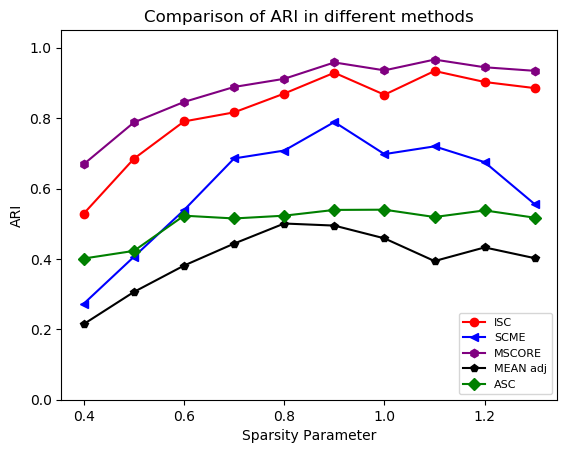

In [11]:
x_lab = np.array([0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3])
plt.plot(x_lab,np.sum (ISCACC, axis= 0)/58,color="red", label="ISC",marker = 'o')
plt.plot(x_lab,np.sum (SCMEACC, axis= 0)/58,color="blue", label="SCME",marker = "<")
plt.plot(x_lab,np.sum (MSCORE, axis= 0)/58,color="purple", label="MSCORE",marker = "h")
plt.plot(x_lab,np.sum (MEANACC, axis= 0)/58,color="black", label="MEAN adj",marker = "p")
plt.plot(x_lab,np.sum (ASCACC, axis= 0)/58,color="green", label="ASC",marker = "D")
plt.legend(loc="lower right",fontsize=8)   # 与plt.legend(loc=1)等价
plt.title("Comparison of ARI in different methods")
plt.ylim((0, 1.05))
plt.xlabel('Sparsity Parameter')
plt.ylabel('ARI')
plt.savefig('DCSBM_sparsity.pdf')